In [1]:
! pip install seaborn
! pip install sklearn

/bin/sh: pip: command not found


/bin/sh: pip: command not found


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv',\
                 sep = ';')

In [4]:
df = df.drop(['duration'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

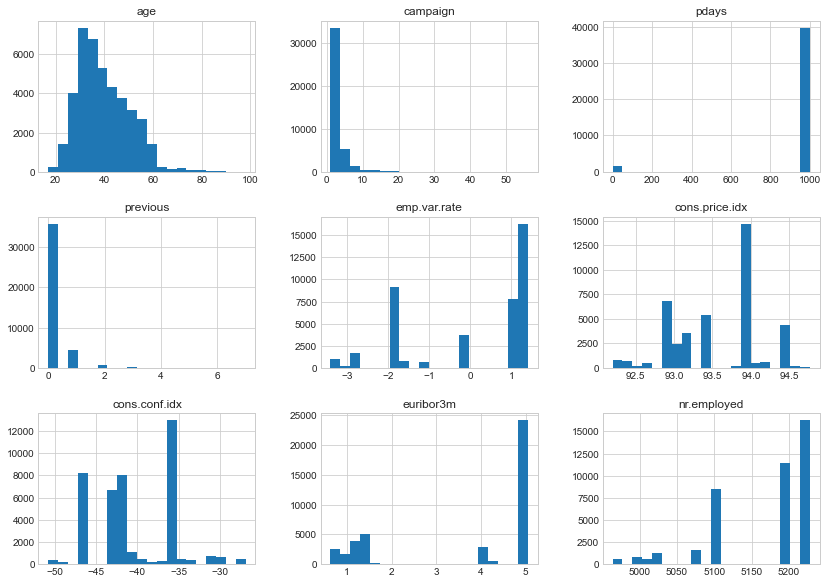

In [6]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10)) #show distributions of numeric data
plt.show()

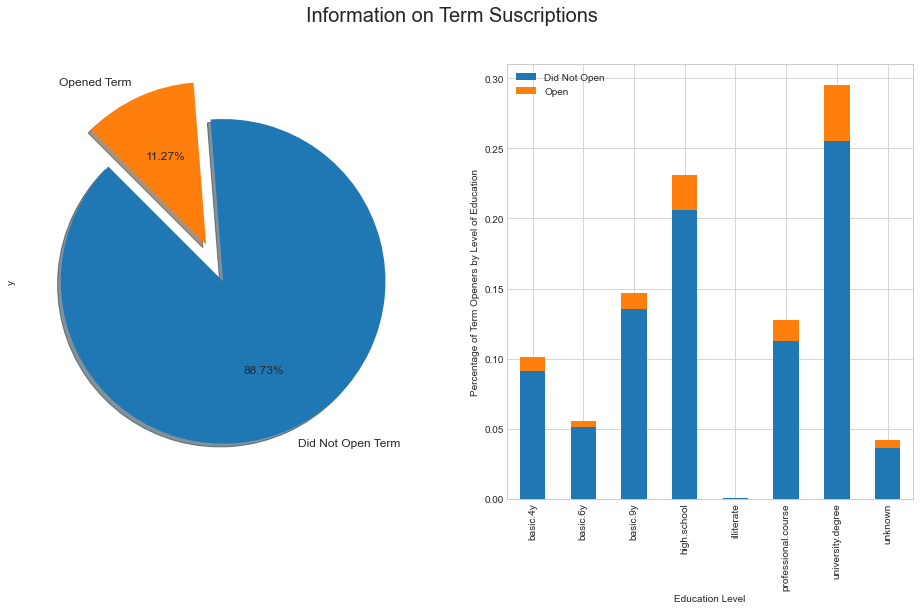

In [7]:
#create a pie chart
labels = 'Did Not Open Term', 'Opened Term' 
fig, ax = plt.subplots(1,2,  figsize=(16,8))

#generate the pie chart
df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                             labels=labels, fontsize=12, startangle=135)

plt.suptitle('Information on Term Suscriptions', fontsize=20)

viz1 = df.groupby(['education', 'y']).size().groupby(level=0).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True) #generates the bar chart on the left

ax[1].set(ylabel="Percentage of Term Openers by Level of Education")
ax[1].set(xlabel="Education Level")
ax[1].legend(['Did Not Open', 'Open'])

/Users/patti/anaconda3/envs/elyra_ga/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  """


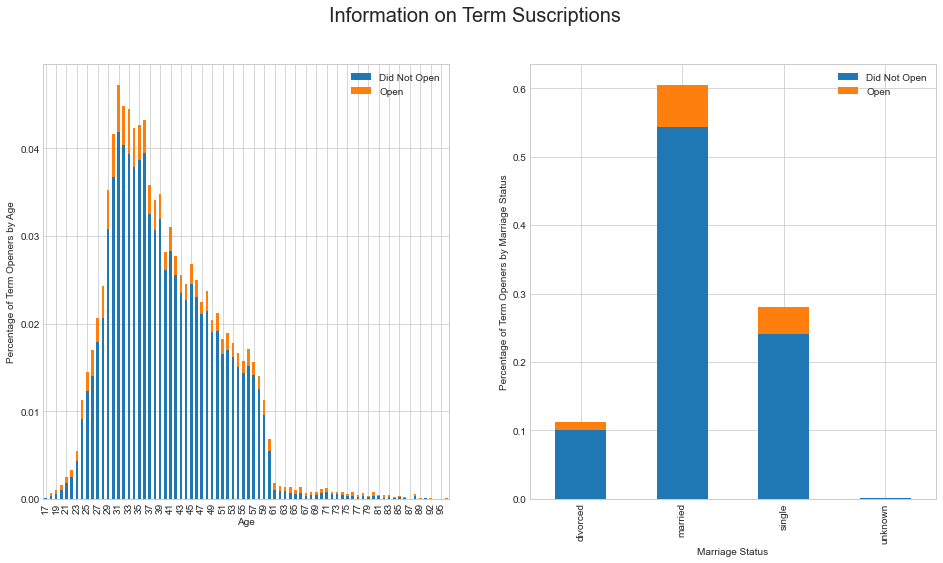

In [8]:
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

viz2 = df.groupby(['age', 'y']).size().groupby(level=0, squeeze = True).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Age")
ax[0].set(xlabel="Age")
ax[0].locator_params(axis='x', nbins=60)
ax[0].legend(['Did Not Open', 'Open'])


viz3 = df.groupby(['marital', 'y']).size().groupby(level=0).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Marriage Status")
ax[1].set(xlabel="Marriage Status")
ax[1].legend(['Did Not Open', 'Open'])

/Users/patti/anaconda3/envs/elyra_ga/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The `squeeze` parameter is deprecated and will be removed in a future version.
  


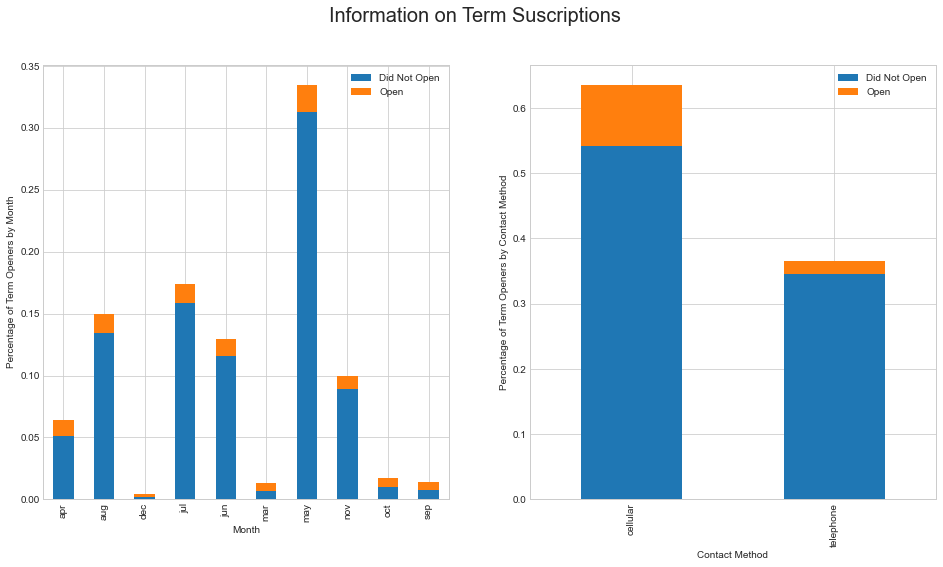

In [9]:
#more visualizations
fig, ax = plt.subplots(1,2,  figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

viz4 = df.groupby(['month', 'y']).size().groupby(level=0, squeeze = True).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[0], stacked=True)

ax[0].set(ylabel="Percentage of Term Openers by Month")
ax[0].set(xlabel="Month")
ax[0].locator_params(axis='x', nbins=60)
ax[0].legend(['Did Not Open', 'Open'])

viz5 = df.groupby(['contact', 'y']).size().groupby(level=0).apply(
    lambda x: x / df.shape[0]
).unstack().plot(kind='bar', ax = ax[1], stacked=True)
# df = df.unstack()
# df.plot(kind = 'bar', ax = ax[1])#, lambda x: len(x) / len(df) * 100)

ax[1].set(ylabel="Percentage of Term Openers by Contact Method")
ax[1].set(xlabel="Contact Method")
ax[1].legend(['Did Not Open', 'Open'])

In [10]:
from sklearn.model_selection import train_test_split
X, y = df.loc[:, df.columns != 'y'], df['y'].map(dict(yes=1, no=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

x = X_train.values
encoder.fit(x)

encoded_x = encoder.transform(x)

x_en = X.values
encoder.fit(x_en)
X_en = encoder.transform(x_en)
X_train_en = pd.DataFrame(encoded_x, columns = X_train.columns)
encoded_df2 = pd.concat([X_train_en, y], axis = 1)
X_en = pd.DataFrame(X_en, columns = X.columns)

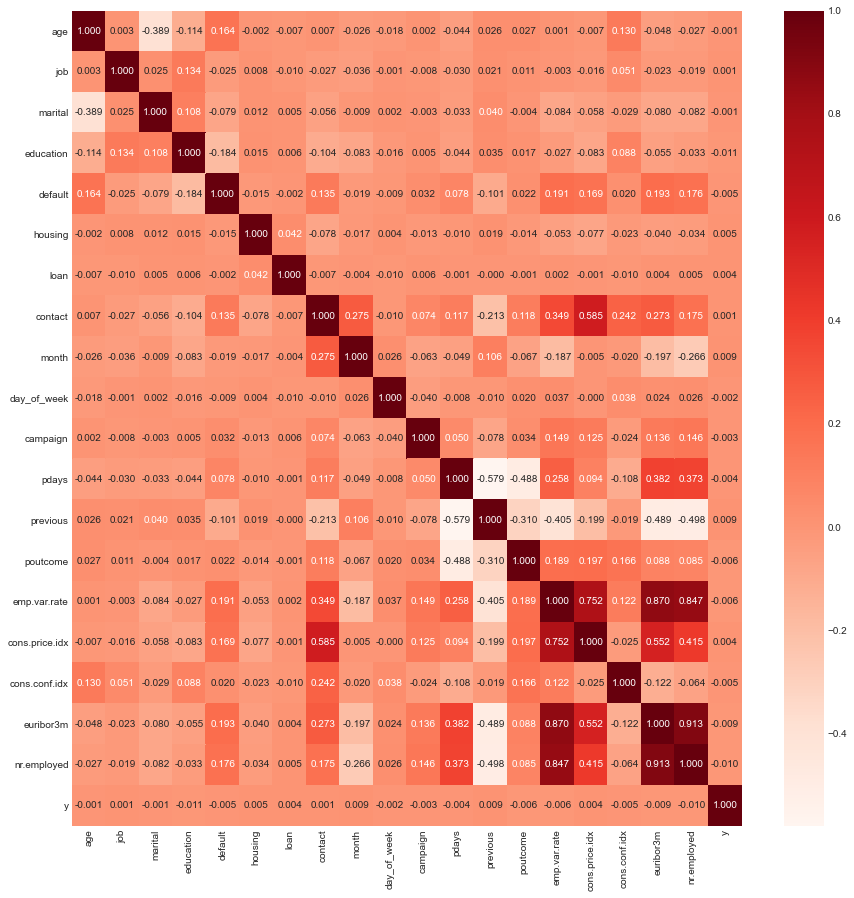

In [12]:
import seaborn as sns
plt.figure(figsize=(15,15))

cor = encoded_df2.corr()
cor
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='0.3f')
plt.show()